Heart Disease Prediction Model

By Elma Fortunate Phiri

The leading cause of death in the developed world is heart disease. Therefore there needs to be work done to help prevent the risks of of having a heart attack or stroke.This dataset consists of features that can be used to predict which patients have a high risk of heart disease.

Aim: To accurately predict the presence of heart disease based on clinical factors to assist in early diagnosis and personalized treatment planning.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.


The following are the features we'll use to predict our target variable (heart disease or no heart disease).
1.
Age - age in years
2.
Sex - (1 = male; 0 = female)
3.
cp - chest pain type
–
0: Typical angina: chest pain related decrease blood supply to the heart
–
1: Atypical angina: chest pain not related to heart
–
2: Non-anginal pain: typically esophageal spasms (non heart related)
–
3: Asymptomatic: chest pain not showing signs of disease
4.
BP -  blood pressure (in mm Hg on admission to the hospital)
–
anything above 130-140 is typically cause for concern
5.
Cholesterol - serum cholestoral in mg/dl
–
serum = LDL + HDL + .2 * triglycerides
–
above 200 is cause for concern
6.
FBS over 120 - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
–
'>126' mg/dL signals diabetes
7.
EKG results - resting electrocardiographic results
–
0: Nothing to note
–
1: ST-T Wave abnormality
•
can range from mild symptoms to severe problems
•
signals non-normal heart beat
–
2: Possible or definite left ventricular hypertrophy
•
Enlarged heart's main pumping chamber
8.
Max HR- maximum heart rate achieved
9.
Exercise angina - exercise induced angina (1 = yes; 0 = no)
10.
ST depression - ST depression induced by exercise relative to rest
–
looks at stress of heart during excercise
–
unhealthy heart will stress more
11.
Slope of ST - the slope of the peak exercise ST segment
–
0: Upsloping: better heart rate with excercise (uncommon)
–
1: Flatsloping: minimal change (typical healthy heart)
–
2: Downslopins: signs of unhealthy heart
12.
Number of vessels fluro - number of major vessels (0-3) colored by flourosopy
–
colored vessel means the doctor can see the blood passing through
–
the more blood movement the better (no clots)
13.
Thallium - thalium stress result
–
1,3: normal
–
6: fixed defect: used to be defect but ok now
–
7: reversable defect: no proper blood movement when excercising
14.
Heart Disease - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [140]:
#Importing the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import ydata_profiling as pp
%matplotlib inline
warnings.filterwarnings('ignore')

In [141]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [142]:
#Data Loading
heart= pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\DS Projects\\Heart_Disease_Prediction.csv")
heart

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [143]:
heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [144]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [145]:
heart.index

RangeIndex(start=0, stop=270, step=1)

In [146]:
heart.shape

(270, 14)

In [147]:
heart.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [148]:
heart.count()

Age                        270
Sex                        270
Chest pain type            270
BP                         270
Cholesterol                270
FBS over 120               270
EKG results                270
Max HR                     270
Exercise angina            270
ST depression              270
Slope of ST                270
Number of vessels fluro    270
Thallium                   270
Heart Disease              270
dtype: int64

In [149]:
heart.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [150]:
#Checking for null values
heart.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [151]:
#Encoding Heart Disease column
heart["Heart Disease"].replace({"Presence" : 1, "Absence": 0},inplace=True)
heart

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [152]:
#Identifying and dealing with outliers
# Identify numerical columns to check for outliers
numerical_cols = heart.select_dtypes(include=['float64', 'int64']).columns


# Calculate the IQR for each numerical column
Q1 = heart[numerical_cols].quantile(0.25)
Q3 = heart[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((heart[numerical_cols] < lower_bound) | (heart[numerical_cols] > upper_bound))

# Removing rows with outliers (optional)
heart = heart[~outliers.any(axis=1)]


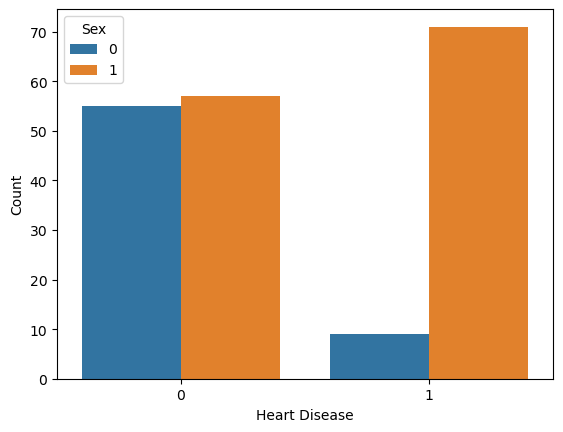

In [153]:
#Target Variable distribution
sns.countplot(x= 'Heart Disease', hue= 'Sex', data= heart)
plt.xlabel('Heart Disease')
plt.ylabel("Count")
plt.show()

This count plot shows that most males have a heart disease compared to their female counterparts

In [154]:
#Heart Disease Frequency by Sex
# 1: Male ,0:Female
# 1: Heart Disease 0: No Heart Disease
pd.crosstab(heart['Heart Disease'], heart.Sex)#.plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])


Sex,0,1
Heart Disease,,
0,55,57
1,9,71


67 Females and 83 Males don't have a heart disease........
20 Females and 100 Males have a heart disease

<Figure size 1200x1000 with 0 Axes>

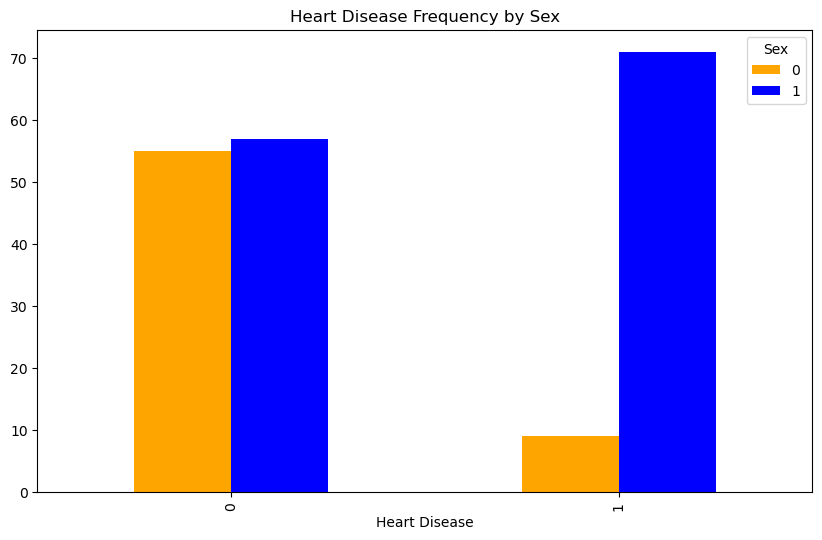

In [155]:
plt.figure(figsize=(12,10))
pd.crosstab(heart['Heart Disease'], heart.Sex).plot(kind="bar", figsize=(10,6), color=["orange", "blue"])
plt.title("Heart Disease Frequency by Sex")
plt.xlabel('Heart Disease')
plt.show()

In [156]:
#Correlation matrix
corr_matrix= heart.corr()
corr_matrix

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.055236,0.177259,0.237413,0.183106,NaN,0.113657,-0.409415,0.157000,0.243988,0.145438,0.410404,0.193266,0.219552
Sex,-0.055236,1.000000,0.182427,0.002911,-0.076709,NaN,0.044359,-0.151768,0.245214,0.201067,0.051083,0.117131,0.466427,0.395919
Chest pain type,0.177259,0.182427,1.000000,0.057347,0.003898,NaN,0.191126,-0.346856,0.413388,0.281903,0.209614,0.276708,0.362415,0.467068
BP,0.237413,0.002911,0.057347,1.000000,0.161226,NaN,0.113660,-0.022849,0.037101,0.195879,0.042888,0.000946,0.113784,0.099870
Cholesterol,0.183106,-0.076709,0.003898,0.161226,1.000000,NaN,0.091892,-0.006085,0.052785,-0.039003,-0.065478,0.125710,0.015884,0.089817
FBS over 120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EKG results,0.113657,0.044359,0.191126,0.113660,0.091892,NaN,1.000000,-0.090268,0.110704,0.150985,0.169807,0.085140,0.014177,0.188217
Max HR,-0.409415,-0.151768,-0.346856,-0.022849,-0.006085,NaN,-0.090268,1.000000,-0.461818,-0.399585,-0.439481,-0.307716,-0.406105,-0.429397
Exercise angina,0.157000,0.245214,0.413388,0.037101,0.052785,NaN,0.110704,-0.461818,1.000000,0.323839,0.308612,0.227840,0.371592,0.421668
ST depression,0.243988,0.201067,0.281903,0.195879,-0.039003,NaN,0.150985,-0.399585,0.323839,1.000000,0.582598,0.341603,0.313174,0.472007


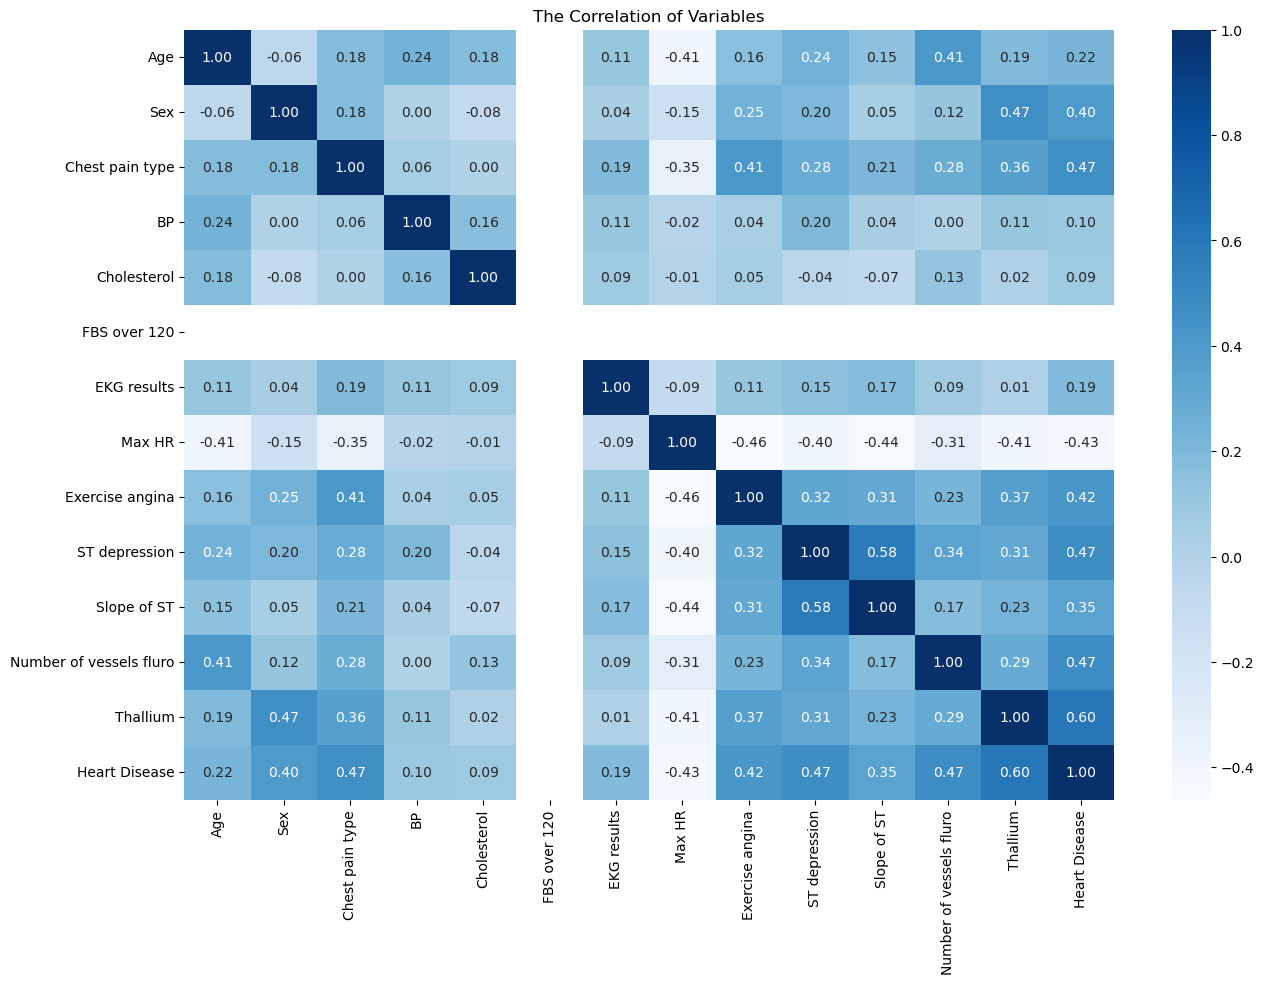

In [157]:
#Correlation Heatmap
plt.figure( figsize= (15,10))
sns.heatmap(corr_matrix, annot= True, cmap= 'Blues', fmt='.2f')
plt.title("The Correlation of Variables")
plt.show()

In [158]:
#Is there a significant difference in blood pressure between males and females?

#Separate blood pressure (BP) heart by gender
male_bp = heart[heart['Sex'] == 1]['BP']
female_bp = heart[heart['Sex'] == 0]['BP']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(male_bp, female_bp, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in blood pressure between males and females.")
else:
    print("There is no significant difference in blood pressure between males and females.")


T-statistic: 0.03892621798805509
P-value: 0.9690158931341617
There is no significant difference in blood pressure between males and females.


In [159]:
#What is the relationship between maximum heart rate and the presence of heart disease?

rel= heart[['Max HR', 'Heart Disease']]
corr_max= rel.corr()
corr_max

,Max HR,Heart Disease
Max HR,1.000000,-0.429397
Heart Disease,-0.429397,1.000000


This indicates a moderate negative correlation between Max HR and the presence of heart disease.
As Max HR increases, the likelihood of heart disease decreases (and vice versa).
A negative correlation suggests that individuals with lower Max HR are more likely to have heart disease.

Text(0, 0.5, 'Maximum Heart Rate (Max HR)')

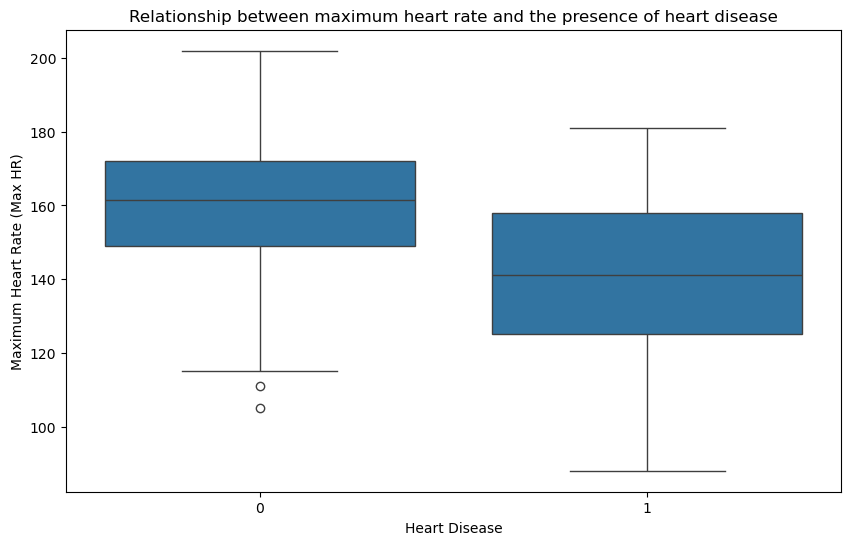

In [160]:
plt.figure(figsize= (10,6))
sns.boxplot(x= 'Heart Disease', y = 'Max HR', data= heart)
plt.title("Relationship between maximum heart rate and the presence of heart disease", fontsize=12)
plt.xlabel("Heart Disease")
plt.ylabel("Maximum Heart Rate (Max HR)")


In [161]:
#How does cholesterol level vary by chest pain type?
#1: Typical angina: chest pain related decrease blood supply to the heart
#2: Atypical angina: chest pain not related to heart
#3: Non-anginal pain: typically esophageal spasms (non heart related)
#4: Asymptomatic: chest pain not showing signs of disease
heart['Chest pain type'].unique()


array([2, 4, 3], dtype=int64)

In [162]:
#chol - serum cholestoral in mg/dl...serum = LDL + HDL + .2 * triglycerides ....above 200 is cause for concern
heart['Cholesterol'].head()

2    261
3    263
4    269
5    177
7    239
Name: Cholesterol, dtype: int64

In [163]:
#How does cholesterol level vary by chest pain type?
#Group by 'Chest pain type' and calculate descriptive statistics for 'Cholesterol'
cholesterol_summary = heart.groupby('Chest pain type')['Cholesterol'].describe()
print(cholesterol_summary)

                 count        mean        std    min    25%    50%     75%  \
Chest pain type                                                              
2                 35.0  247.228571  40.549233  160.0  214.5  245.0  276.00   
3                 57.0  244.421053  46.948280  141.0  214.0  235.0  269.00   
4                100.0  246.790000  43.729724  149.0  212.0  248.0  274.25   

                   max  
Chest pain type         
2                325.0  
3                360.0  
4                354.0  


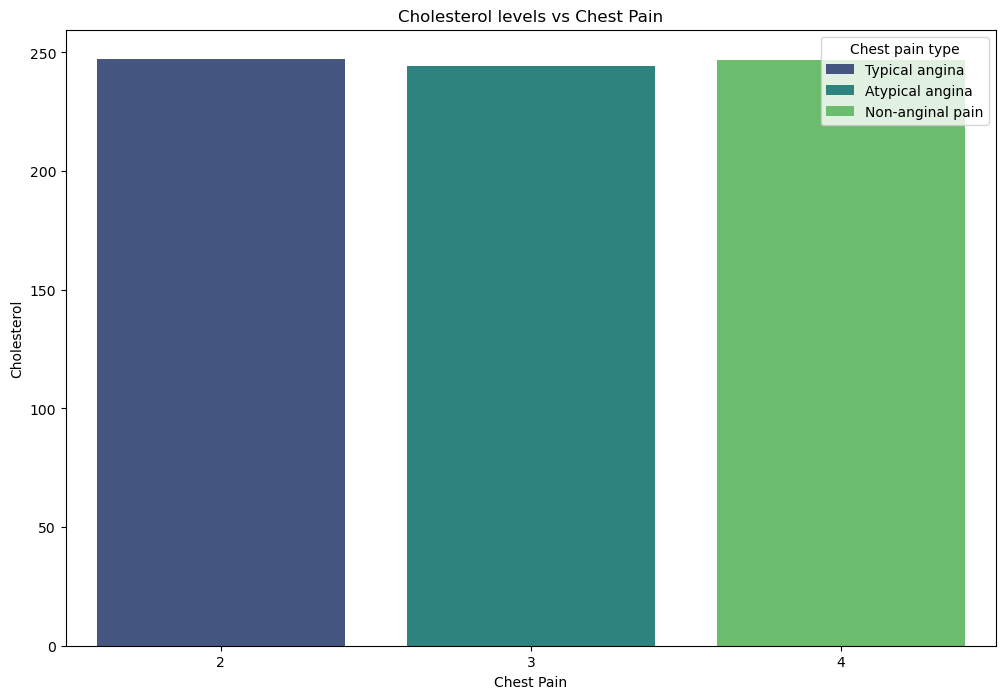

In [164]:
#How does cholesterol level vary by chest pain type?
plt.figure(figsize= (12,8))
sns.barplot(x= 'Chest pain type', y = 'Cholesterol', data= heart, palette='viridis', ci= None)
plt.title("Cholesterol levels vs Chest Pain")
plt.xlabel('Chest Pain')
plt.ylabel("Cholesterol")
plt.legend(title= 'Chest pain type',labels= ['Typical angina','Atypical angina', 'Non-anginal pain','Asymptomatic'])
plt.show()

In [165]:
#How does the distribution of exercise-induced angina differ for individuals with and without heart disease?
#Group by 'Heart Disease' and calculate the distribution of 'Exercise induced angina'
angina_distribution = heart.groupby('Heart Disease')['Exercise angina'].value_counts(normalize=True)
print(angina_distribution)

Heart Disease  Exercise angina
0              0                  0.848214
               1                  0.151786
1              1                  0.550000
               0                  0.450000
Name: proportion, dtype: float64


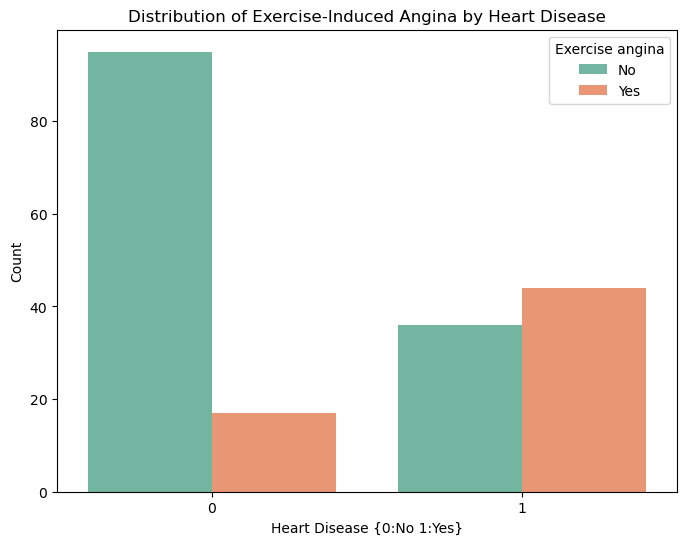

In [166]:
#How does the distribution of exercise-induced angina differ for individuals with and without heart disease?
#Exercise angina{1: Yes, 0: No}
plt.figure(figsize=(8,6))
sns.countplot(x='Heart Disease', hue='Exercise angina', data= heart, palette='Set2')
plt.title('Distribution of Exercise-Induced Angina by Heart Disease')
plt.xlabel("Heart Disease {0:No 1:Yes}")
plt.ylabel("Count")
plt.legend(title = 'Exercise angina', labels= ['No', 'Yes'])
plt.show()

From the graph,patients with heart disease are less likely to experience exercise-induced angina compared to those without heart disease. 

(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4')])

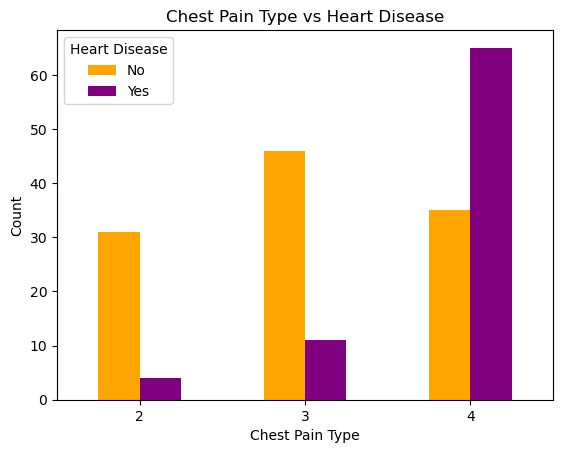

In [167]:
#Which chest pain type is most associated with heart disease?
#1: Typical angina: chest pain related decrease blood supply to the heart
#2: Atypical angina: chest pain not related to heart
#3: Non-anginal pain: typically esophageal spasms (non heart related)
#4: Asymptomatic: chest pain not showing signs of disease
pd.crosstab(heart['Chest pain type'], heart['Heart Disease']).plot(kind= 'bar', color= ['orange','purple'])
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title = 'Heart Disease', labels= ["No", "Yes"])
plt.xticks(rotation= 0)

Patients with asymptomatic conditions are more likely to have heart disease than those with Typical pain.

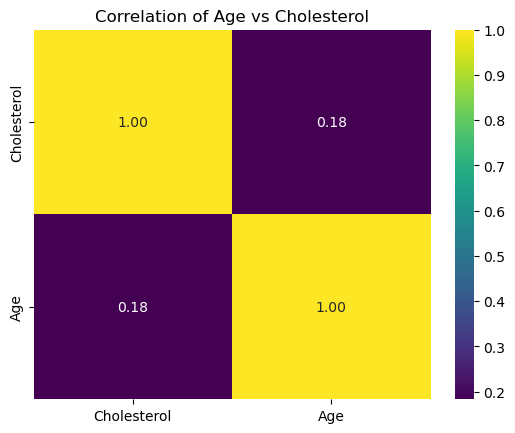

In [168]:
#How does age correlate with cholesterol levels?
Chol_age=heart[['Cholesterol', 'Age']]
cmatrix= Chol_age.corr()
sns.heatmap(cmatrix, annot= True, fmt= '.2f', cmap= 'viridis')
plt.title("Correlation of Age vs Cholesterol")
plt.show()


The heatmap suggests that there is a slight positive correlation between age and cholesterol levels

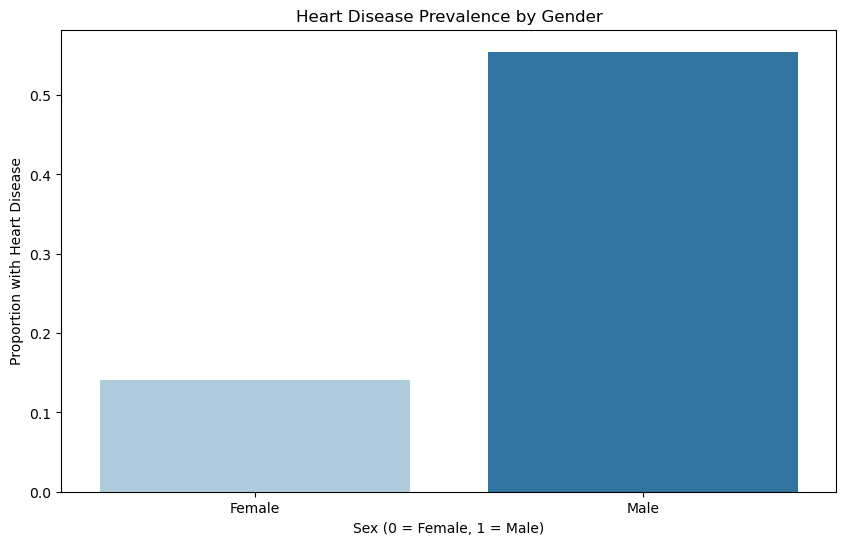

In [169]:
#Which gender has a higher prevalence of heart disease?
# 1: Male ,0:Female
# 1: Heart Disease 0: No Heart Disease
gendersum= heart.groupby('Sex')['Heart Disease'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x= gendersum.index, y= gendersum.values, palette='Paired')
plt.title("Heart Disease Prevalence by Gender", fontsize=12)
plt.xlabel("Sex (0 = Female, 1 = Male)", fontsize=10)
plt.ylabel("Proportion with Heart Disease", fontsize=10)
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Males have a higher heart disease prevelance rate

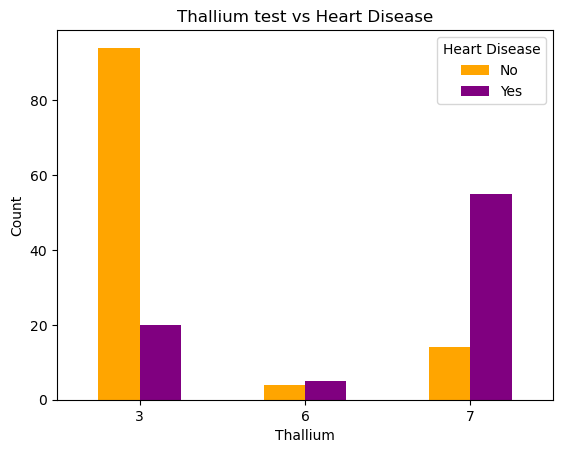

In [170]:
#Is there a relationship between thallium test results and heart disease?
#thal - thalium stress result
#1,3: normal
#6: fixed defect: used to be defect but ok now
#7: reversable defect: no proper blood movement when excercising
pd.crosstab(heart['Thallium'], heart['Heart Disease']).plot(kind= 'bar', color= ['orange','purple'])
plt.title("Thallium test vs Heart Disease")
plt.xlabel("Thallium")
plt.ylabel("Count")
plt.legend(title = 'Heart Disease', labels= ["No", "Yes"])
plt.xticks(rotation = 0)
plt.show()

People who have thalium stress 7 have a heart disease

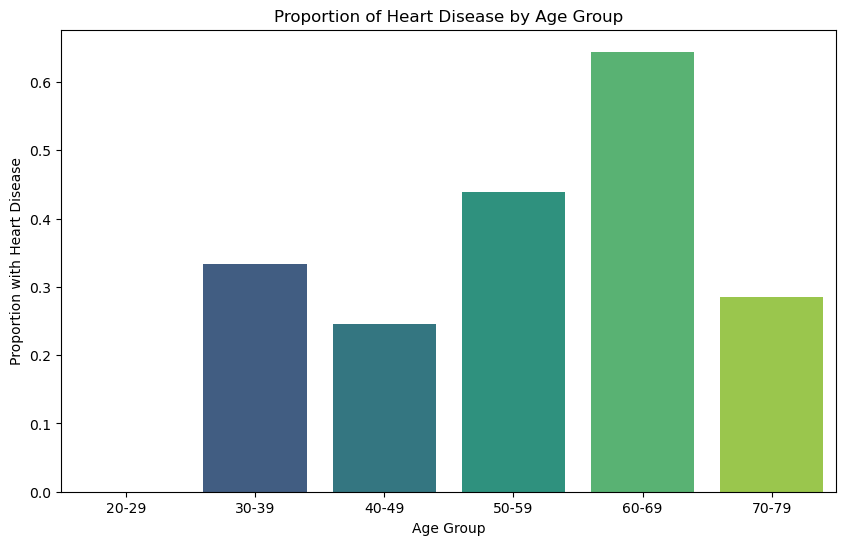

In [171]:
#Are certain age groups more prone to having heart disease?
#Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
heart['Age Group'] = pd.cut(heart['Age'], bins=bins, labels=labels, right=False)

# Calculate proportions of heart disease by age group
age_group_summary = heart.groupby('Age Group')['Heart Disease'].mean()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_summary.index, y=age_group_summary.values, palette="viridis")
plt.title("Proportion of Heart Disease by Age Group", fontsize=12)
plt.xlabel("Age Group", fontsize=10)
plt.ylabel("Proportion with Heart Disease", fontsize=10)
plt.xticks(rotation=0)
plt.show()


The age group 60-69 is more prone to having a heart disease

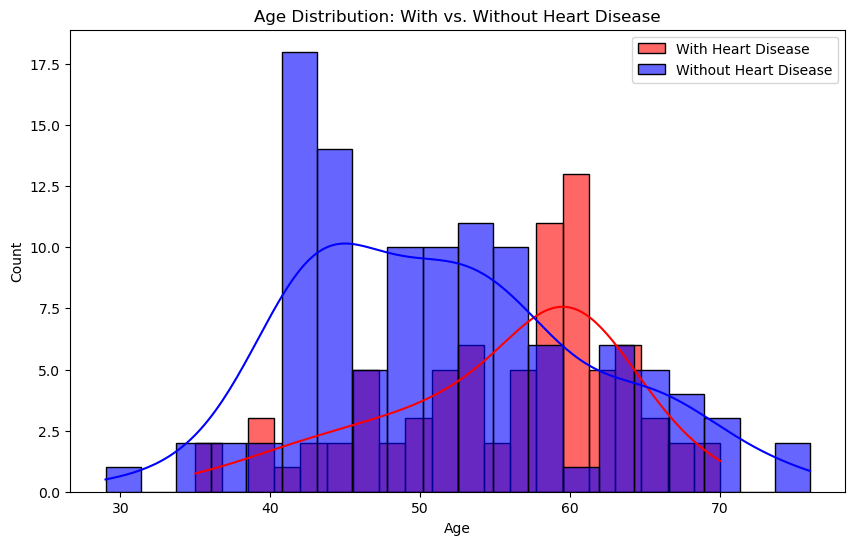

In [172]:
#What is the age distribution of individuals with heart disease versus those without it
#Separate individuals with and without heart disease
with_disease = heart[heart['Heart Disease'] == 1]['Age']
without_disease = heart[heart['Heart Disease'] == 0]['Age']

plt.figure(figsize=(10, 6))
sns.histplot(with_disease, kde=True, color="red", label="With Heart Disease", bins=20, alpha=0.6)
sns.histplot(without_disease, kde=True, color="blue", label="Without Heart Disease", bins=20, alpha=0.6)
plt.title("Age Distribution: With vs. Without Heart Disease", fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend()
plt.show()


Red (With Heart Disease): Shows the age distribution of individuals diagnosed with heart disease.


Blue (Without Heart Disease): Represents the age distribution of individuals without heart disease...

The red curve peaks around 55-60 years, indicating that individuals in this age range are more likely to have heart disease.
The blue curve peaks around 45-50 years, showing that younger individuals in the dataset are less likely to have heart disease.

Heart disease appears to be more prevalent in older individuals.The graph suggests a strong relationship between age and heart disease, with older individuals showing a higher prevalence

Blood Pressure Summary:
                count     mean        std    min    25%    50%    75%    max
Heart Disease                                                              
0              112.0  126.500  14.922020   94.0  118.0  128.5  138.0  160.0
1               80.0  129.575  15.542327  100.0  120.0  128.0  140.0  170.0

Cholesterol Summary:
                count        mean        std    min     25%    50%    75%  \
Heart Disease                                                              
0              112.0  242.839286  44.277087  141.0  209.75  237.5  269.0   
1               80.0  250.825000  43.329405  166.0  222.00  254.0  282.0   

                 max  
Heart Disease         
0              360.0  
1              353.0  


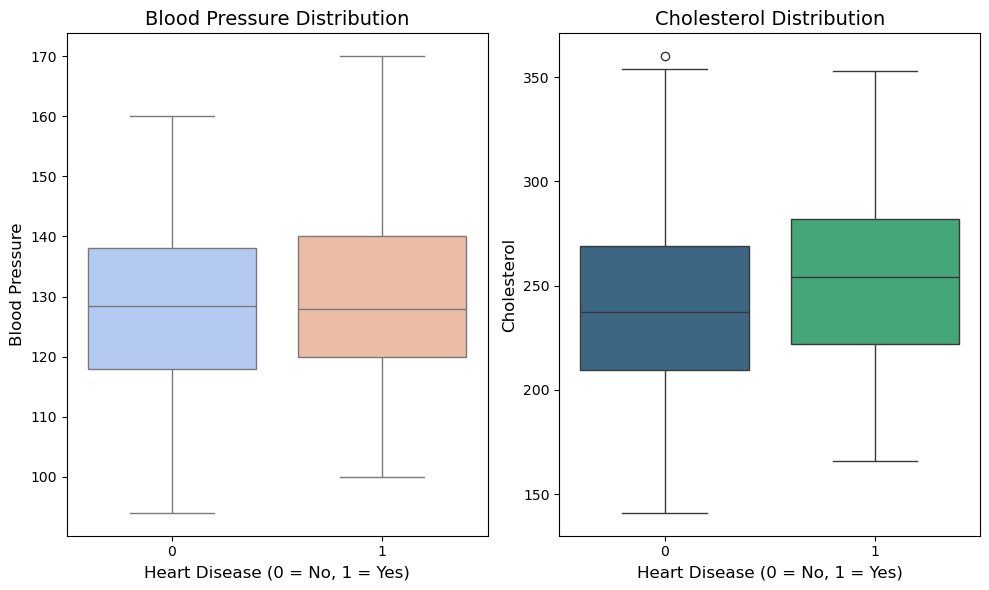

In [173]:
#How do individuals with heart disease compare to those without in terms of blood pressure and cholesterol?
#Summary statistics
blood_pressure_summary = heart.groupby('Heart Disease')['BP'].describe()
cholesterol_summary = heart.groupby('Heart Disease')['Cholesterol'].describe()
print("Blood Pressure Summary:\n", blood_pressure_summary)
print("\nCholesterol Summary:\n", cholesterol_summary)

# Visualization of Blood Pressure
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Heart Disease', y='BP', data=heart, palette='coolwarm')
plt.title("Blood Pressure Distribution", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Blood Pressure", fontsize=12)

# Visualization of Cholesterol
plt.subplot(1, 2, 2)
sns.boxplot(x='Heart Disease', y='Cholesterol', data=heart, palette='viridis')
plt.title("Cholesterol Distribution", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Cholesterol", fontsize=12)

plt.tight_layout()
plt.show()


Individuals with heart disease tend to have higher and more variable blood pressure, with some extreme cases of high blood pressure.

Cholesterol levels are generally higher for individuals with heart disease, but the variability between the groups is not as pronounced as blood pressure.

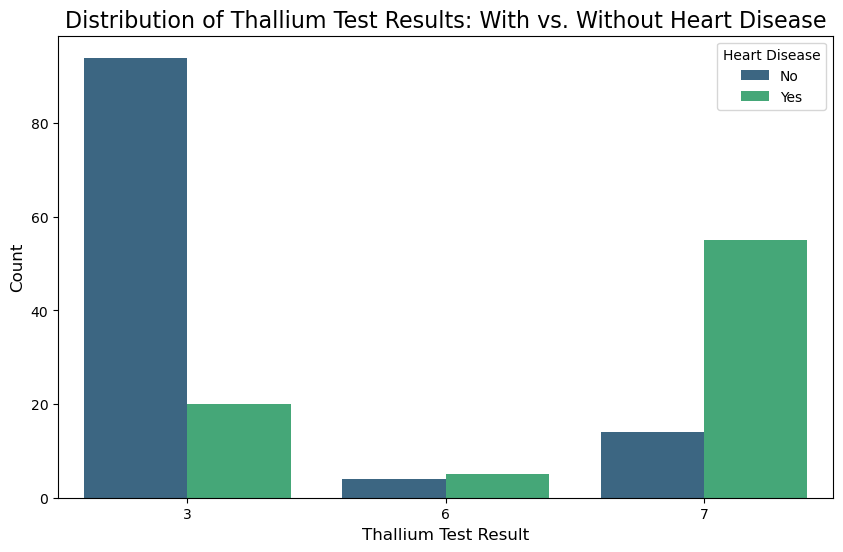

In [174]:
#How does the distribution of thallium test results differ for individuals with and without heart disease?
plt.figure(figsize=(10, 6))
sns.countplot(data=heart, x='Thallium', hue='Heart Disease', palette='viridis')

# Add title and labels
plt.title("Distribution of Thallium Test Results: With vs. Without Heart Disease", fontsize=16)
plt.xlabel("Thallium Test Result", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"], loc='upper right')
plt.show()

The graph illustrates how thallium test results vary between people with heart disease and those without. Most people without heart disease tend to score a 3, while a score of 7 is often seen in those who do have heart disease, suggesting it might help predict the condition. A score of 6 is not as common, but it tends to be a little more frequent among individuals with heart disease.

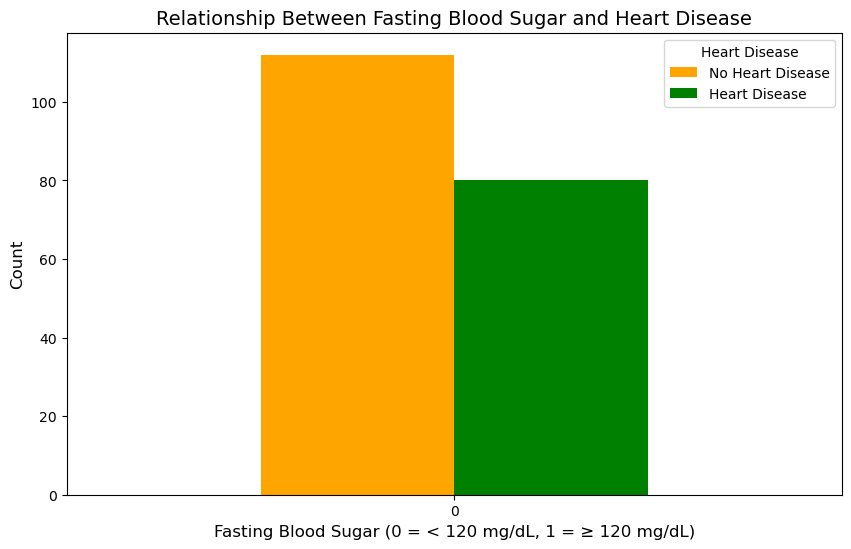

In [175]:
#How do blood sugar levels relate with heart diseases
fbs_heart_disease = pd.crosstab(heart['FBS over 120'], heart['Heart Disease'])

# Plot the relationship
fbs_heart_disease.plot(kind='bar', figsize=(10, 6), color=['orange', 'green'])
plt.title('Relationship Between Fasting Blood Sugar and Heart Disease', fontsize=14)
plt.xlabel('Fasting Blood Sugar (0 = < 120 mg/dL, 1 = ≥ 120 mg/dL)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease', fontsize=10)
plt.xticks(rotation=0)
plt.show()

The graph displays how fasting blood sugar levels connect to heart disease. When fasting blood sugar is less than 120 mg/dL, more people do not have heart disease compared to those who do. When fasting blood sugar is 120 mg/dL or higher, there are fewer total cases, but still a bit more people without heart disease.

In [176]:
#Relationship between heart disease and ST depression
correlation = heart['Heart Disease'].corr(heart["ST depression"])
print(f"Correlation between Heart Disease and ST Depression: {correlation:.2f}")


Correlation between Heart Disease and ST Depression: 0.47


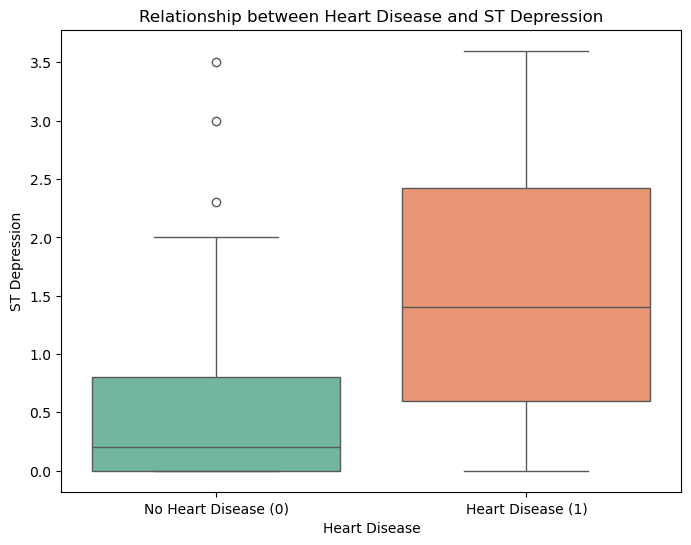

In [177]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease', y="ST depression", data=heart, palette='Set2')
plt.title('Relationship between Heart Disease and ST Depression')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression')
plt.xticks([0, 1], ['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

The correlation between Heart Disease and ST Depression is fairly strong indicating that patients with ST Depression are most likely to have a heart disease


Model Building

In [178]:
heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Age Group
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,50-59
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,60-69
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,70-79
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0,60-69
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1,50-59


In [179]:
#Encoding variables
le= LabelEncoder()
heart["Age Group Encoded"] =le.fit_transform(heart["Age Group"])
heart["Age Group Encoded"] .tail()

263    2
264    2
266    2
267    3
268    3
Name: Age Group Encoded, dtype: int32

In [180]:
#Features and target viariable
X = heart.drop("Heart Disease", axis = 1)
y = heart['Heart Disease']
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Age Group,Age Group Encoded
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,50-59,3
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,60-69,4
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,70-79,5
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,60-69,4
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,50-59,3


In [181]:
#Standardising  features
scaler= StandardScaler()
X_scaled = scaler.fit_transform(heart.drop(columns=["Age Group"])) 


In [182]:
#Splitting data
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y, test_size=0.2,random_state=0)

Baseline Model

In [183]:

y_pred_baseline= [y_train.mean()]* len(y_train)
mae_baseline= mean_absolute_error(y_train,y_pred_baseline)
print(f"The MAE of the baseline model is {mae_baseline}")

The MAE of the baseline model is 0.4938271604938272


In [184]:
# Define models
rf = RandomForestClassifier()

# Fit each model
rf.fit(X_train, y_train)
print(f"{rf} model trained successfully!")

knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
print(f"{knn} model trained successfully!")

log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)
print(f"{log_reg} model trained successfully!")



RandomForestClassifier() model trained successfully!
KNeighborsClassifier() model trained successfully!
LogisticRegression() model trained successfully!


In [185]:
#Model accuracy
model_score_rf=rf.score(X_test,y_test)
print(f"Accuracy score of a RandomForestClassifier is {model_score_rf:4f}")

model_score_knn=knn.score(X_test,y_test)
print(f"Accuracy score KNN is {model_score_knn:4f}")

model_score_lg=log_reg.score(X_test,y_test)
print(f"Accuracy score LogisticRegression is {model_score_lg:4f}")

Accuracy score of a RandomForestClassifier is 1.000000
Accuracy score KNN is 0.948718
Accuracy score LogisticRegression is 1.000000


In [186]:
#the parameter grid for hyperparameter tuning
# Define the hyperparameter grid
param_grid = {
'n_estimators': [100, 200, 300],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth': [10, 20, 30, None],
'criterion': ['gini']
}
grid_search = GridSearchCV(estimator= rf, param_grid= param_grid,cv = 3,n_jobs= -1, verbose= 2)
grid_search.fit(X_train, y_train)
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
# Best estimator
best_rfc = grid_search.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [187]:
# Predictions
y_pred = best_rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

Model Evaluation

In [188]:
#MAE of our model
mae_model= mean_absolute_error(y_test, y_pred)
print(f"The MAE of the actual model is {mae_model:4f}")

The MAE of the actual model is 0.000000


This is significantly lower than the baseline MAE, indicating that the trained model is effectively learning from the data and making much more accurate predictions.

In [189]:
#Model accuracy
model_accuracy= accuracy_score(y_test,y_pred)
print(f"The model accuracy is {model_accuracy:.4f}")
    

The model accuracy is 1.0000


In [190]:
#confusion matrix
conf_matrix= confusion_matrix(y_test,y_pred)
conf_matrix

array([[27,  0],
       [ 0, 12]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Text(50.722222222222214, 0.5, 'Actual')

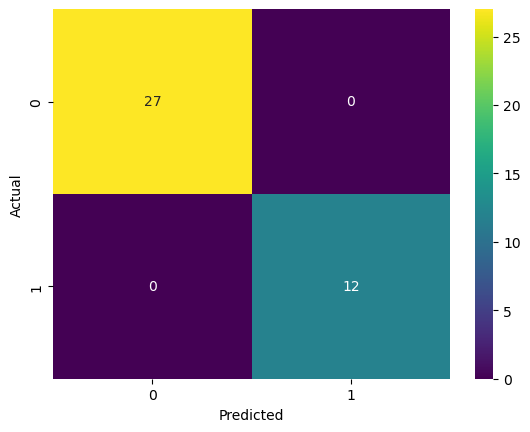

In [191]:
#classification_report
report= classification_report(y_test,y_pred)
print(report)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')

The model correctly predicted 27 instances as "No" when the actual label was "No".The model incorrectly predicted 0 instances as "Yes" when the actual label was "No".


The model incorrectly predicted 0 instances as "No" when the actual label was "Yes".The model correctly predicted 12 instances as "Yes" when the actual label was "Yes."

In [192]:
#Checking for overfitting

# Training accuracy
train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
    
    # Test accuracy
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
    
print(f"{rf} Model Training Accuracy: {train_accuracy:.2f}")
print(f"{rf} Model Test Accuracy: {test_accuracy:.2f}\n")

RandomForestClassifier() Model Training Accuracy: 1.00
RandomForestClassifier() Model Test Accuracy: 1.00



Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) curve')

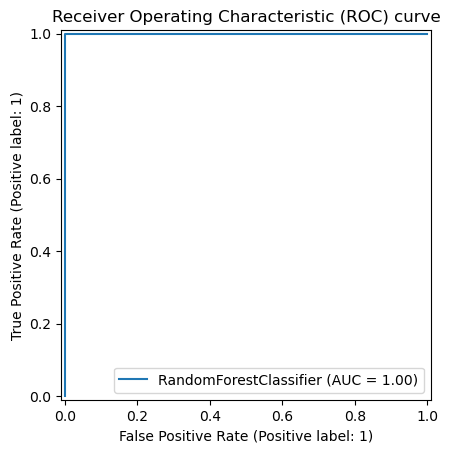

In [193]:
#ROC display curve
RocCurveDisplay.from_estimator(estimator= rf,X = X_test, y =y_test);
plt.title("Receiver Operating Characteristic (ROC) curve")

Text(0.5, 0, 'Importance Score')

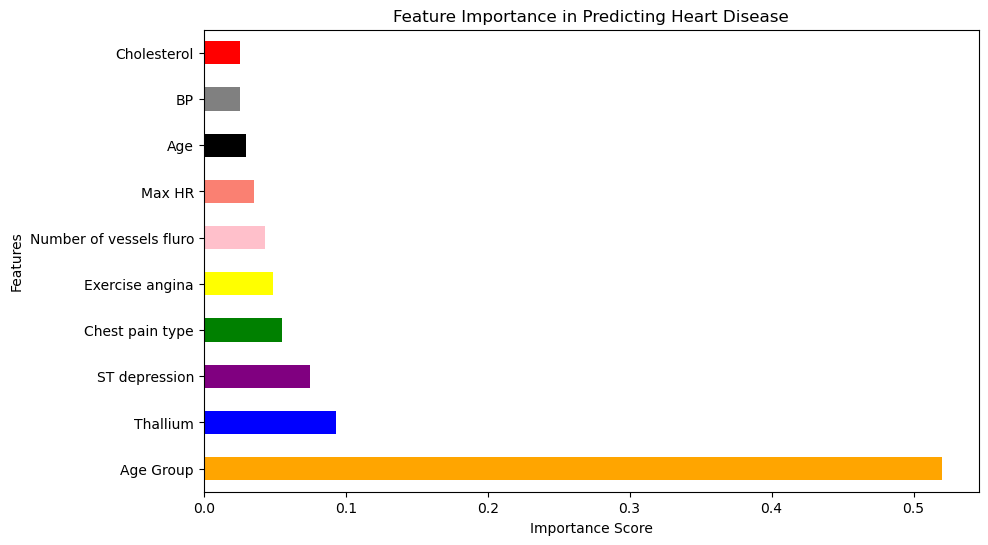

In [194]:
#Feature Importance
best_rf = grid_search.best_estimator_
features = X.columns
# Get feature importances from the best RandomForestClassifier model
feature_importances = best_rf.feature_importances_
feature_importances = pd.Series(feature_importances, index=features)
feature_importances = feature_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color=['orange','blue','purple','green','yellow','pink','salmon','black','gray','red'])
plt.title('Feature Importance in Predicting Heart Disease')
plt.ylabel('Features')
plt.xlabel('Importance Score')


Higher importance indicates a greater influence on the model’s predictions.The  5 most important predictors for heart disease are Age group, ST Depression, Exercise angina, Chest pain type, and Thallium.

Conclusion:

 In conclusion,the Heart Disease prediction model aims to provide a reliable and accurate tool for predicting the presence of heart disease based on clinical factors like age, chest pain type, blood pressure, and other medical indicators. By using machine learning methods like Random Forest, the model finds patterns in the data that can lead to earlier diagnoses and better treatment plans tailored to each person. This model supports doctors in evaluating how at-risk a patient is and helps them make better choices. It also plays a part in improving patient health outcomes and easing the burden on healthcare systems. Plus, by pointing out key factors, the model allows for focused actions and better management of heart disease overall.